In [1]:
#add auto reload for src function testing
%load_ext autoreload
%autoreload 2

#let's add the project directory to our module path
import os
import sys

module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)
    
    
#also import all of our modules
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from src import data_cleaning
from src import cm_functions

#and here is our data directiory
data_folder = '../../data/'

In [2]:
model_2_data = pd.read_csv(data_folder+'model_2.csv',dtype={'PIN': 'string'}, index_col=0)
parcels = pd.read_csv(data_folder+'EXTR_Parcel_final.csv',dtype={'Major': 'string', 'Minor':'string', 'PIN': 'string'})
res_bldg = pd.read_csv(data_folder+'EXTR_ResBldg_final.csv', dtype={'Major':'string', 'Minor':'string', 'PIN':'string', 'ZipCode': 'string'})

In [3]:
model_2_data

,LogSalePrice,LogSqFt,is_waterfront,PIN
0,13.235692,3.285557,0,2130430120
1,12.983101,3.295567,0,9406520630
2,13.017003,3.033424,0,1402810020
3,12.170445,3.245513,0,1245500098
4,13.199324,3.093422,0,7973202320
...,...,...,...,...
28203,14.001990,3.459392,0,9290850760
28204,12.999065,3.155336,0,4059400095
28205,13.429848,3.356026,0,3816700025
28206,13.521139,3.352183,0,6150200505


In [4]:
res_bldg['address_zip'] = res_bldg['Address'].apply(lambda x: x.split(' ')[-1])

In [5]:
res_bldg.loc[:,['address_zip', 'ZipCode']]

,address_zip,ZipCode
0,98003,98003
1,98178,98178
2,98102,98102
3,,<NA>
4,98040,98040
...,...,...
27854,98074,98074
27855,,<NA>
27856,,<NA>
27857,98103,98103


In [6]:
res_bldg.ZipCode.isna().sum()

4881

In [7]:
res_bldg['address_zip'].map(lambda entry: True if (len(entry) == 5) else False).sum()

22964

In [8]:
res_bldg.address_zip.value_counts()

              4881
98042          717
98058          681
98023          653
98038          604
              ... 
98042-3001       1
988122           1
98074-6745       1
98075-8010       1
98013            1
Name: address_zip, Length: 105, dtype: int64

In [9]:
pd.options.display.max_rows = 20

In [10]:
res_bldg.ZipCode.value_counts()

98042         717
98058         661
98023         653
98038         604
98115         589
             ... 
98103-8173      1
981182019       1
89045           1
98034-2540      1
98085           1
Name: ZipCode, Length: 105, dtype: Int64

In [61]:
res_bldg['zip_code'] = res_bldg['ZipCode'].apply(lambda x: x[:4] if type(x)==str else x)

In [62]:
res_bldg.zip_code.value_counts()

9805    2632
9800    2554
9811    2497
9803    2491
9810    1927
        ... 
9184       1
9881       1
9059       1
9830       1
9808       1
Name: zip_code, Length: 31, dtype: int64

In [63]:
zip_df = res_bldg.dropna(subset=['zip_code'])
zip_df

,Unnamed: 0,Major,Minor,BldgNbr,NbrLivingUnits,Address,BuildingNumber,Fraction,DirectionPrefix,StreetName,...,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost,PIN,address_zip,zip_code
0,0,010050,0380,1,1,2435 S 354TH ST 98003,2435,,S,354TH,...,1994,0,0,0,0,5,0,0100500380,98003,9800
1,1,017900,0315,1,1,12254 43RD AVE S 98178,12254,,,43RD,...,1942,0,0,0,0,3,0,0179000315,98178,9817
2,2,018800,0095,1,1,1602 LAKEVIEW BLVD E 98102,1602,,,LAKEVIEW,...,1984,0,0,0,0,3,0,0188000095,98102,9810
4,4,019110,0145,1,1,4512 90TH AVE SE 98040,4512,,,90TH,...,1950,0,0,0,0,4,0,0191100145,98040,9804
5,5,019110,0310,1,1,4520 88TH AVE SE 98040,4520,,,88TH,...,1967,0,0,0,0,3,0,0191100310,98040,9804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27851,27851,880730,0190,1,1,20636 NE 76TH PL 98053,20636,,NE,76TH,...,1969,0,0,0,0,3,0,8807300190,98053,9805
27852,27852,195160,0190,1,1,25643 29TH AVE S 98032,25643,,,29TH,...,1959,0,0,0,0,3,0,1951600190,98032,9803
27853,27853,195340,0635,1,1,23402 25TH AVE S 98198,23402,,,25TH,...,1955,0,0,0,0,4,0,1953400635,98198,9819
27854,27854,195440,0120,1,1,22131 NE 9TH PL 98074,22131,,NE,9TH,...,1987,0,0,0,0,4,0,1954400120,98074,9807


In [64]:
zip_df = zip_df[(zip_df['zip_code']!='98')&(zip_df['zip_code']!='9059')]

In [65]:
zips = zip_df.groupby('zip_code').zip_code.count()

In [66]:
def is_enuf(x):
    if x in zips:
        return True
    else:
        return False

In [67]:
zips = zips[zips>150]

In [68]:
mask = zip_df.zip_code.map(is_enuf)
filtered_zip = zip_df[mask]

In [69]:
filtered_zip.zip_code.value_counts()

9805    2632
9800    2554
9811    2497
9803    2491
9810    1927
9802    1842
9804    1391
9807    1324
9812    1104
9813     757
9819     705
9814     692
9817     627
9816     610
9801     564
9815     465
9809     386
9806     210
Name: zip_code, dtype: int64

In [70]:
filtered_zip

,Unnamed: 0,Major,Minor,BldgNbr,NbrLivingUnits,Address,BuildingNumber,Fraction,DirectionPrefix,StreetName,...,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost,PIN,address_zip,zip_code
0,0,010050,0380,1,1,2435 S 354TH ST 98003,2435,,S,354TH,...,1994,0,0,0,0,5,0,0100500380,98003,9800
1,1,017900,0315,1,1,12254 43RD AVE S 98178,12254,,,43RD,...,1942,0,0,0,0,3,0,0179000315,98178,9817
2,2,018800,0095,1,1,1602 LAKEVIEW BLVD E 98102,1602,,,LAKEVIEW,...,1984,0,0,0,0,3,0,0188000095,98102,9810
4,4,019110,0145,1,1,4512 90TH AVE SE 98040,4512,,,90TH,...,1950,0,0,0,0,4,0,0191100145,98040,9804
5,5,019110,0310,1,1,4520 88TH AVE SE 98040,4520,,,88TH,...,1967,0,0,0,0,3,0,0191100310,98040,9804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27851,27851,880730,0190,1,1,20636 NE 76TH PL 98053,20636,,NE,76TH,...,1969,0,0,0,0,3,0,8807300190,98053,9805
27852,27852,195160,0190,1,1,25643 29TH AVE S 98032,25643,,,29TH,...,1959,0,0,0,0,3,0,1951600190,98032,9803
27853,27853,195340,0635,1,1,23402 25TH AVE S 98198,23402,,,25TH,...,1955,0,0,0,0,4,0,1953400635,98198,9819
27854,27854,195440,0120,1,1,22131 NE 9TH PL 98074,22131,,NE,9TH,...,1987,0,0,0,0,4,0,1954400120,98074,9807


In [71]:
zip_dummies = pd.get_dummies(filtered_zip.zip_code)

In [72]:
filtered_zip = filtered_zip.loc[:,['PIN', 'zip_code']]

In [73]:
dummies = pd.get_dummies(filtered_zip, columns=['zip_code'])

In [74]:
dummies

,PIN,zip_code_9800,zip_code_9801,zip_code_9802,zip_code_9803,zip_code_9804,zip_code_9805,zip_code_9806,zip_code_9807,zip_code_9809,zip_code_9810,zip_code_9811,zip_code_9812,zip_code_9813,zip_code_9814,zip_code_9815,zip_code_9816,zip_code_9817,zip_code_9819
0,0100500380,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0179000315,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0188000095,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0191100145,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0191100310,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27851,8807300190,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
27852,1951600190,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27853,1953400635,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
27854,1954400120,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


# Testing

In [75]:
model_4_data = pd.merge(dummies, model_2_data, how='inner', on='PIN')

test_df = model_4_data.drop(columns=['PIN'])

In [76]:
model = cm_functions.get_fsm(test_df)

Rsquared: 1.0
BETA values:
Intercept        1.000000e+00
zip_code_9801   -1.000000e+00
zip_code_9802   -1.000000e+00
zip_code_9803   -1.000000e+00
zip_code_9804   -1.000000e+00
                     ...     
zip_code_9817   -1.000000e+00
zip_code_9819   -1.000000e+00
LogSalePrice     8.396062e-16
LogSqFt         -1.257675e-15
is_waterfront    5.542442e-16
Length: 21, dtype: float64
------------------------------------
 
                            OLS Regression Results                            
Dep. Variable:          zip_code_9800   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.083e+30
Date:                Thu, 18 Jun 2020   Prob (F-statistic):               0.00
Time:                        14:46:29   Log-Likelihood:             7.0950e+05
No. Observations:               23035   AIC:                        -1.419e+06
Df Residuals:           

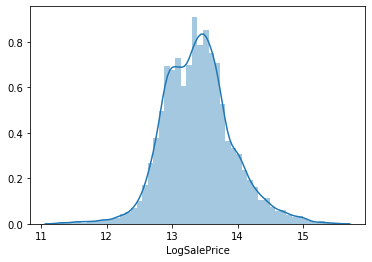

In [77]:
sns.distplot(test_df.LogSalePrice)